Import Libraries

In [7]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data preprocessing

Image Preprocessing by Loading image using keras

In [8]:
#Training image processing
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


In [9]:
#Validation image processing
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [10]:
training_set

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [11]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[181.25 170.25 174.25]
   [172.75 161.75 165.75]
   [177.5  166.5  170.5 ]
   ...
   [177.75 166.75 170.75]
   [156.75 145.75 149.75]
   [162.25 151.25 155.25]]

  [[180.25 169.25 173.25]
   [170.5  159.5  163.5 ]
   [177.25 166.25 170.25]
   ...
   [176.75 165.75 169.75]
   [165.25 154.25 158.25]
   [168.25 157.25 161.25]]

  [[178.5  167.5  171.5 ]
   [169.   158.   162.  ]
   [175.   164.   168.  ]
   ...
   [158.75 147.75 151.75]
   [154.5  143.5  147.5 ]
   [174.25 163.25 167.25]]

  ...

  [[209.25 202.25 209.25]
   [200.25 193.25 200.25]
   [205.   198.   205.  ]
   ...
   [212.5  203.5  208.5 ]
   [212.5  203.5  208.5 ]
   [220.5  211.5  216.5 ]]

  [[210.75 203.75 210.75]
   [195.25 188.25 195.25]
   [205.25 198.25 205.25]
   ...
   [206.   197.   202.  ]
   [216.25 207.25 212.25]
   [203.75 194.75 199.75]]

  [[214.5  207.5  214.5 ]
   [201.25 194.25 201.25]
   [198.5  191.5  198.5 ]
   ...
   [212.   203.   208.  ]
   [225.   216.   221.  ]
   [212.5  203.5  20

There may be some overshooting problem
1. choose small learning rate default 0.001 we take 0.0001
2. if underfitting, increase number of neurons
3. add more cnn layer to extract more features from images
4. if mode unable to capture relevent feature or model confusing due to lack of feature, feed with more feature

Model Building

In [12]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential

In [13]:
model = Sequential()

CNN Building

In [14]:
model.add(Conv2D(filters=32, kernel_size=(3,3), padding = 'same', activation='relu', input_shape=(128,128,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [15]:
model.add(Conv2D(filters=64, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [16]:
model.add(Conv2D(filters=128, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [17]:
model.add(Conv2D(filters=256, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [18]:
model.add(Conv2D(filters=512, kernel_size=(3,3), padding = 'same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

In [19]:
model.add(Dropout(0.25))#avoid overfitting

In [20]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
model.add(Dropout(0.4))

Output layer

In [23]:
model.add(Dense(units=38, activation='softmax'))

Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

Model Training Area

In [26]:
training_history = model.fit(x=training_set, validation_data = validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - 223s 97ms/step - loss: 1.4027 - accuracy: 0.5891 - val_loss: 0.5967 - val_accuracy: 0.8136
Epoch 2/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.4517 - accuracy: 0.8584 - val_loss: 0.3451 - val_accuracy: 0.8887
Epoch 3/10
2197/2197 [==============================] - 206s 94ms/step - loss: 0.2718 - accuracy: 0.9124 - val_loss: 0.3028 - val_accuracy: 0.9045
Epoch 4/10
2197/2197 [==============================] - 210s 95ms/step - loss: 0.1849 - accuracy: 0.9400 - val_loss: 0.1907 - val_accuracy: 0.9404
Epoch 5/10
2197/2197 [==============================] - 209s 95ms/step - loss: 0.1365 - accuracy: 0.9554 - val_loss: 0.1940 - val_accuracy: 0.9407
Epoch 6/10
2197/2197 [==============================] - 208s 95ms/step - loss: 0.1079 - accuracy: 0.9644 - val_loss: 0.1471 - val_accuracy: 0.9530
Epoch 7/10
2197/2197 [==============================] - 214s 97ms/step - loss: 0.0901 - accuracy: 0.9706 - val_loss: 0

Model Evaluation

In [27]:
#Evaluation on training set
training_loss, training_accuracy = model.evaluate(training_set)

2197/2197 [==============================] - 84s 38ms/step - loss: 0.0291 - accuracy: 0.9908


In [28]:
print(training_loss, training_accuracy)

0.029122043401002884 0.9907532334327698


In [29]:
#Evaluation on validation set
validation_loss, validation_accuracy = model.evaluate(validation_set)

550/550 [==============================] - 20s 36ms/step - loss: 0.1278 - accuracy: 0.9628


In [30]:
print(validation_loss, validation_accuracy)

0.12783657014369965 0.9627817273139954


Saving Model

In [ ]:
model.save('Trained_Model.keras')

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001B64A508310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000001B64A508310>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get 

INFO:tensorflow:Assets written to: Trained_Model.json\assets


INFO:tensorflow:Assets written to: Trained_Model.json\assets


In [32]:
training_history.history

{'loss': [1.4027413129806519,
  0.45173418521881104,
  0.27176421880722046,
  0.18492835760116577,
  0.13654351234436035,
  0.10794074088335037,
  0.09013382345438004,
  0.07297489047050476,
  0.0663406178355217,
  0.055833641439676285],
 'accuracy': [0.5891030430793762,
  0.858382523059845,
  0.9123693108558655,
  0.9400383830070496,
  0.9553880095481873,
  0.9644213914871216,
  0.9706380367279053,
  0.9761291742324829,
  0.9782772660255432,
  0.9821893572807312],
 'val_loss': [0.596729040145874,
  0.3451082706451416,
  0.30280089378356934,
  0.19069235026836395,
  0.1940412074327469,
  0.14712044596672058,
  0.1745733916759491,
  0.1590307652950287,
  0.13549865782260895,
  0.12783664464950562],
 'val_accuracy': [0.8136239647865295,
  0.8887434601783752,
  0.9044502377510071,
  0.9404165744781494,
  0.9407011270523071,
  0.9529933929443359,
  0.9533917307853699,
  0.9555543065071106,
  0.9580013751983643,
  0.9627817273139954]}

In [33]:
#Record the training history in a json file
import json
with open("trained_history.json", "w") as f:
    json.dump(str(training_history.history), f)

In [34]:
training_history.history['val_accuracy']

[0.8136239647865295,
 0.8887434601783752,
 0.9044502377510071,
 0.9404165744781494,
 0.9407011270523071,
 0.9529933929443359,
 0.9533917307853699,
 0.9555543065071106,
 0.9580013751983643,
 0.9627817273139954]

Accuracy Map

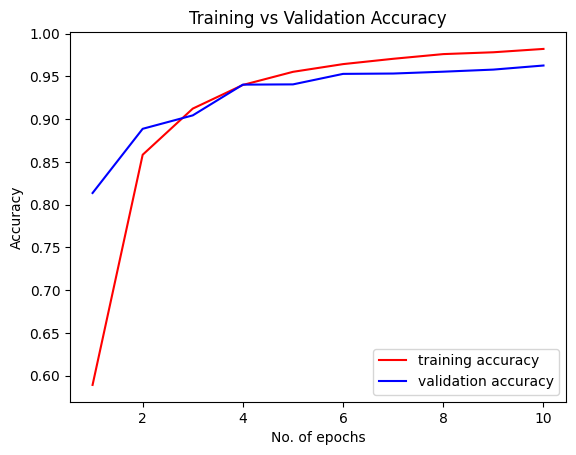

In [35]:
epochs = [i for i in range(1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='training accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='validation accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

PRECISION RECALL MATRIX

In [36]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [38]:
y_prediction = model.predict(test_set)
y_prediction, y_prediction.shape

550/550 [==============================] - 17s 30ms/step


(array([[9.9943489e-01, 5.5484113e-04, 1.2073816e-09, ..., 2.5142692e-13,
         2.0508590e-12, 7.7574676e-11],
        [9.9866462e-01, 9.9309895e-04, 1.1078043e-07, ..., 5.3933889e-11,
         5.3902244e-10, 1.1547112e-09],
        [9.9969327e-01, 2.9772773e-04, 4.7431691e-08, ..., 1.3120454e-12,
         1.4484408e-11, 1.9156488e-09],
        ...,
        [3.2578797e-08, 2.8919997e-10, 6.3136916e-08, ..., 5.5080625e-09,
         2.2125486e-10, 9.9998164e-01],
        [3.8783771e-08, 5.8670868e-10, 2.6519562e-08, ..., 1.1253381e-08,
         9.7524799e-10, 9.9999225e-01],
        [6.5108652e-18, 2.5019323e-17, 2.4607980e-15, ..., 3.2683209e-15,
         1.9478103e-15, 9.9999976e-01]], dtype=float32),
 (17572, 38))

In [39]:
prediction_category = tf.argmax(y_prediction, axis=1)

In [40]:
prediction_category

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [42]:
true_category = tf.concat([y for x, y in test_set], axis=0)
true_category

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [43]:
y_true = tf.argmax(true_category, axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

Applying precision formula

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_true, prediction_category, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.95      0.99      0.97       497
                          Apple___Cedar_apple_rust       0.95      0.98      0.97       440
                                   Apple___healthy       0.99      0.96      0.97       502
                               Blueberry___healthy       0.95      0.98      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      0.99      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.95      0.88      0.91       410
                       Corn_(maize)___Common_rust_       0.98      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.97      0.

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, prediction_category)
cm

array([[454,  15,   0, ...,   0,   0,   0],
       [  0, 494,   0, ...,   0,   0,   0],
       [  1,   2, 432, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 442,   0],
       [  0,   0,   0, ...,   0,   0, 471]], dtype=int64)

Confusion Matrix Visualization

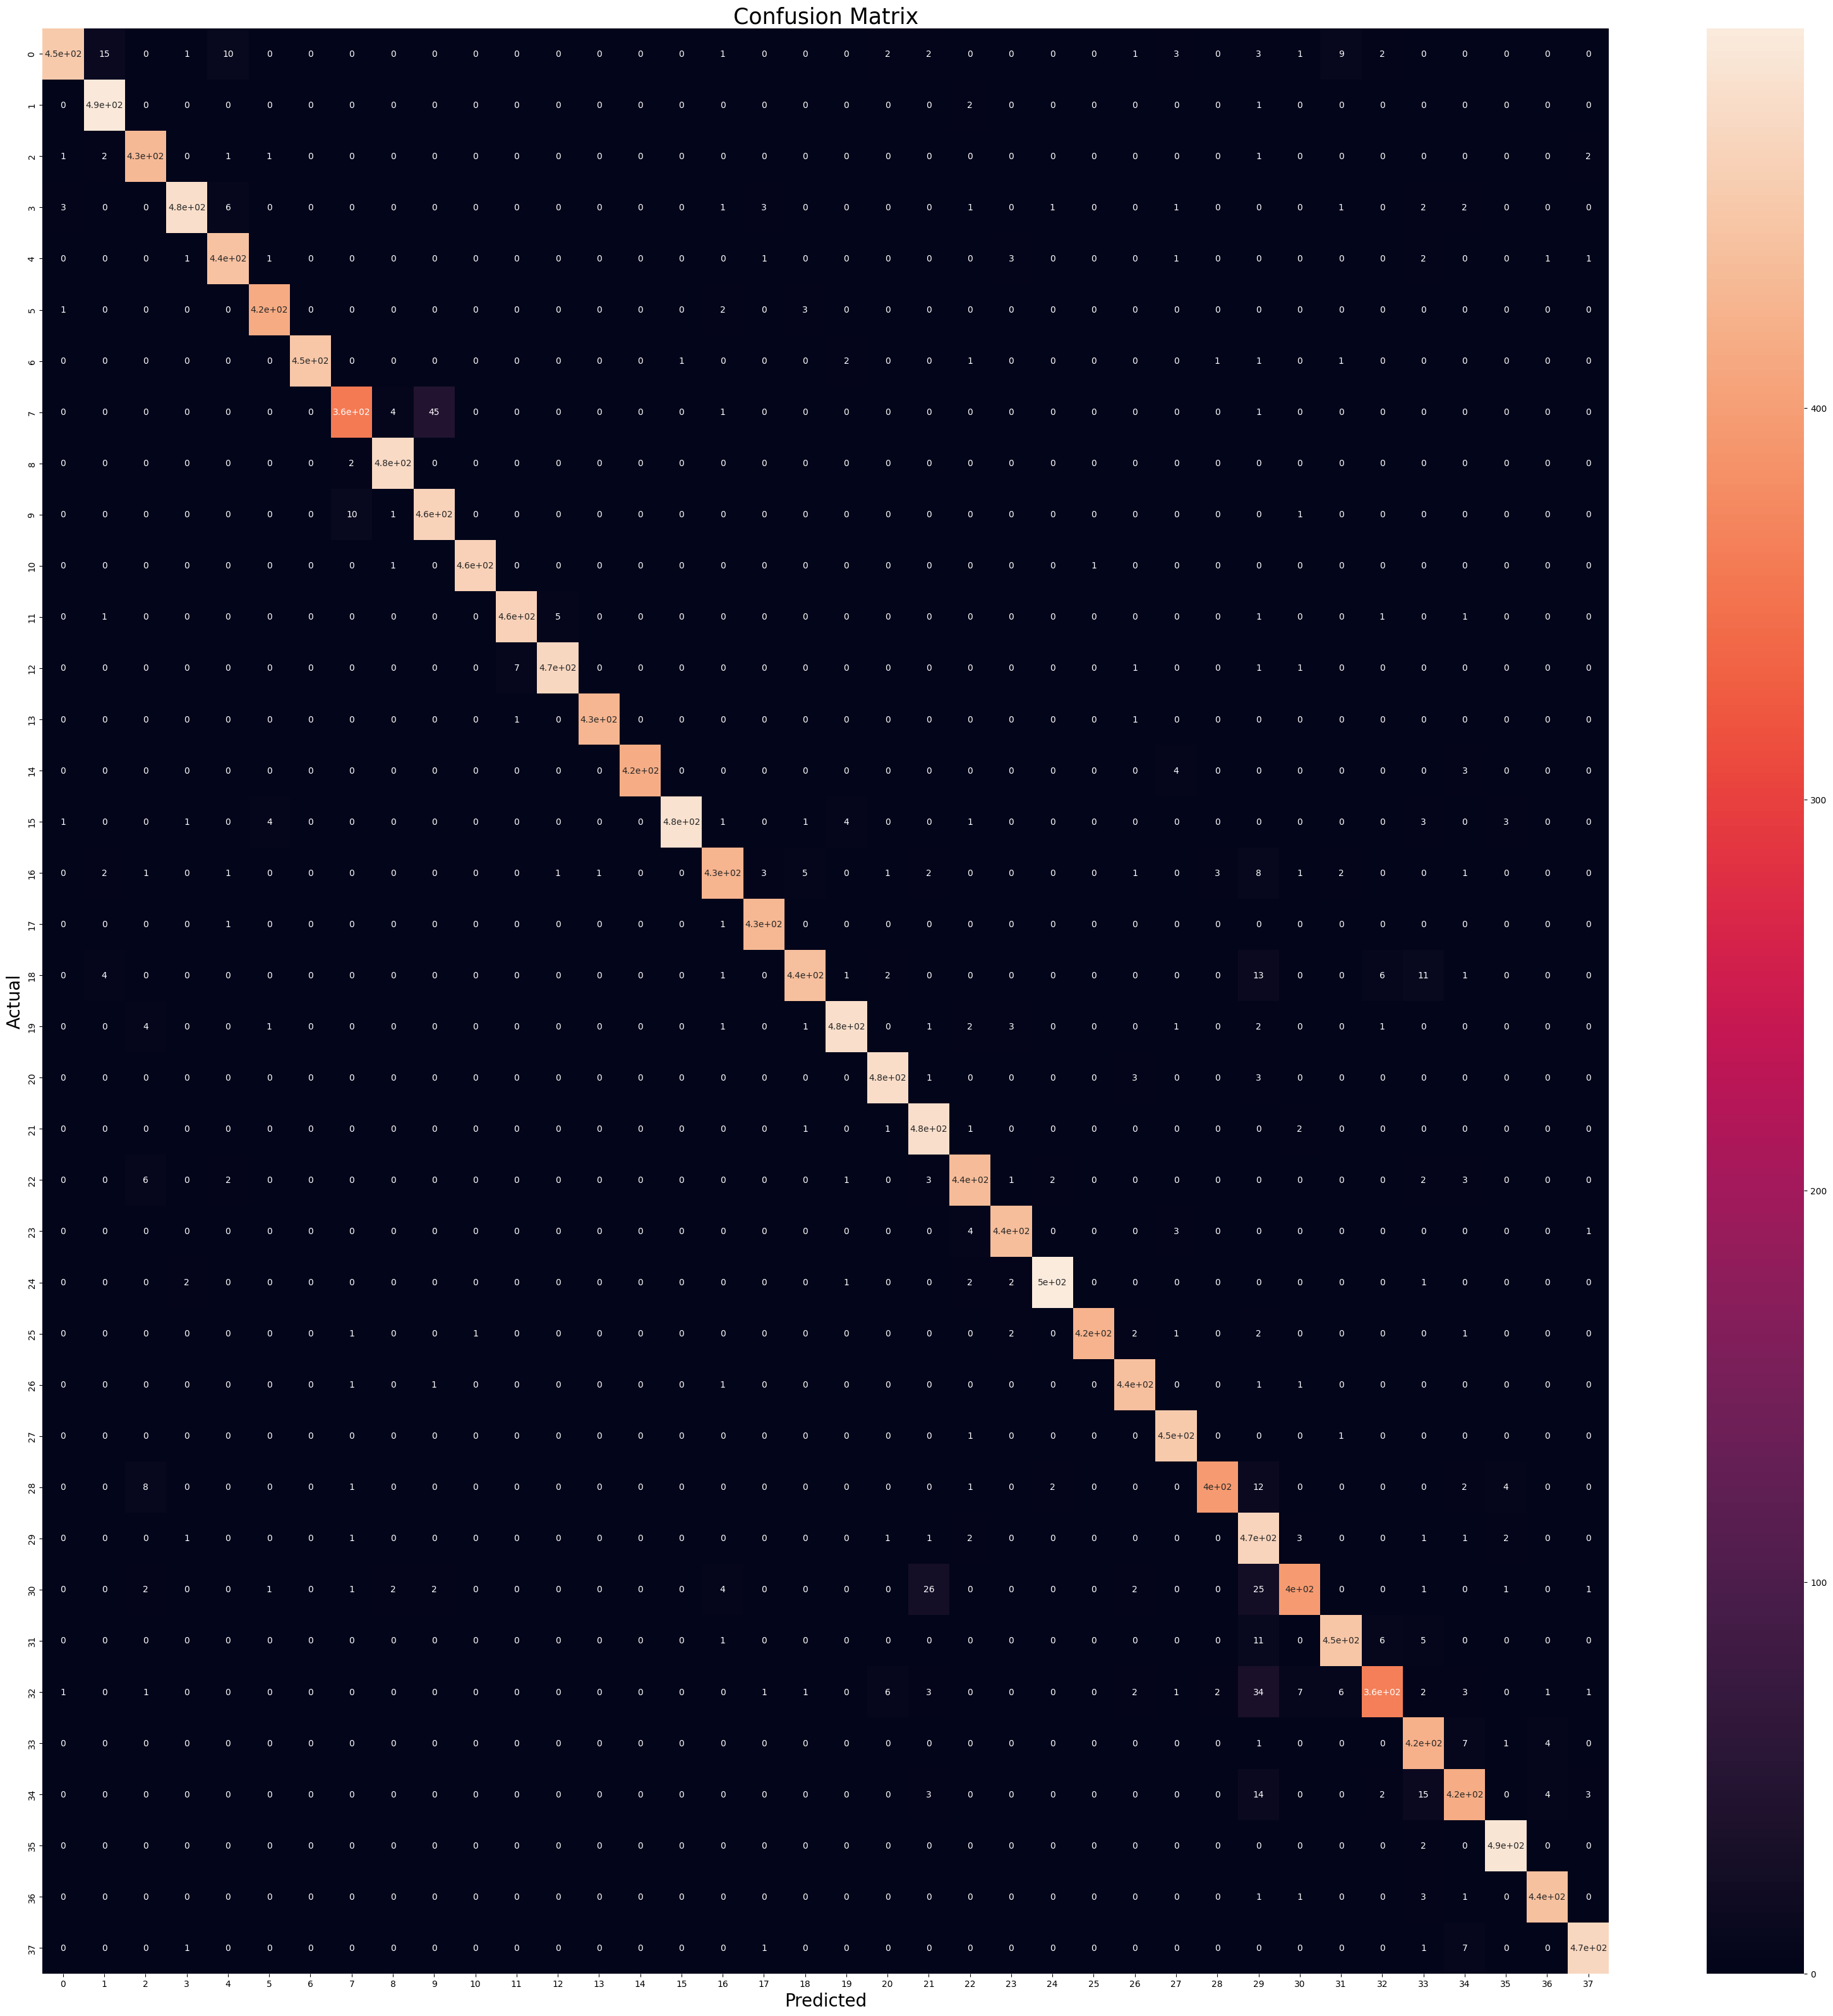

In [50]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()